In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_csv('/content/train_data.csv')


In [3]:
df.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0.0
1,is upset that he can t update his facebook by ...,0.0
2,i dived many times for the ball managed to sav...,0.0
3,my whole body feels itchy and like its on fire,0.0
4,no it s not behaving at all i m mad why am i h...,0.0


In [5]:
df.shape

(379751, 2)

In [6]:
df = df.head(500)
print(df.shape)

(500, 2)


In [ ]:
df.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [7]:
print(df.columns)

Index(['sentence', 'sentiment'], dtype='object')


In [8]:
example = df['sentence'][49]
print(example)


oh i m so sorry i didn t think about that before retweeting


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['oh', 'i', 'm', 'so', 'sorry', 'i', 'didn', 't', 'think', 'about']

In [10]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.pos_tag(tokens)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('oh', 'UH'),
 ('i', 'JJ'),
 ('m', 'VBP'),
 ('so', 'RB'),
 ('sorry', 'JJ'),
 ('i', 'NN'),
 ('didn', 'VBP'),
 ('t', 'NN'),
 ('think', 'VBP'),
 ('about', 'IN'),
 ('that', 'DT'),
 ('before', 'IN'),
 ('retweeting', 'VBG')]

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('oh', 'UH'),
 ('i', 'JJ'),
 ('m', 'VBP'),
 ('so', 'RB'),
 ('sorry', 'JJ'),
 ('i', 'NN'),
 ('didn', 'VBP'),
 ('t', 'NN'),
 ('think', 'VBP'),
 ('about', 'IN')]

In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


(S
  oh/UH
  i/JJ
  m/VBP
  so/RB
  sorry/JJ
  i/NN
  didn/VBP
  t/NN
  think/VBP
  about/IN
  that/DT
  before/IN
  retweeting/VBG)


In [13]:
# VADER(Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
sia.polarity_scores('You are very beautiful')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6361}

In [15]:
sia.polarity_scores('example')
#example = sentiment49

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  Sentence = row['sentence']
  myid = i
  res[myid] = sia.polarity_scores(Sentence)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
res

{0: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.3818},
 1: {'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'compound': -0.7269},
 2: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.4939},
 3: {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'compound': -0.25},
 4: {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.6597},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767},
 7: {'neg': 0.098, 'neu': 0.446, 'pos': 0.455, 'compound': 0.7906},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.5994},
 13: {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.1027},
 14: {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4767},
 15: {'neg': 0.098, 'neu': 0.736,

In [18]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.167,0.833,0.000,-0.3818
1,0.295,0.705,0.000,-0.7269
2,0.000,0.814,0.186,0.4939
3,0.321,0.500,0.179,-0.2500
4,0.265,0.735,0.000,-0.6597
...,...,...,...,...
495,1.000,0.000,0.000,-0.0772
496,0.206,0.794,0.000,-0.0772
497,0.000,1.000,0.000,0.0000
498,0.000,1.000,0.000,0.0000


In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.merge(df, left_index=True, right_index=True, how='left')


In [20]:
vaders.head()

,neg,neu,pos,compound,sentence,sentiment
0,0.167,0.833,0.000,-0.3818,awww that s a bummer you shoulda got david car...,0.0
1,0.295,0.705,0.000,-0.7269,is upset that he can t update his facebook by ...,0.0
2,0.000,0.814,0.186,0.4939,i dived many times for the ball managed to sav...,0.0
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,0.0
4,0.265,0.735,0.000,-0.6597,no it s not behaving at all i m mad why am i h...,0.0


In [21]:
print(vaders.columns)
print(df.columns)

Index(['neg', 'neu', 'pos', 'compound', 'sentence', 'sentiment'], dtype='object')
Index(['sentence', 'sentiment'], dtype='object')


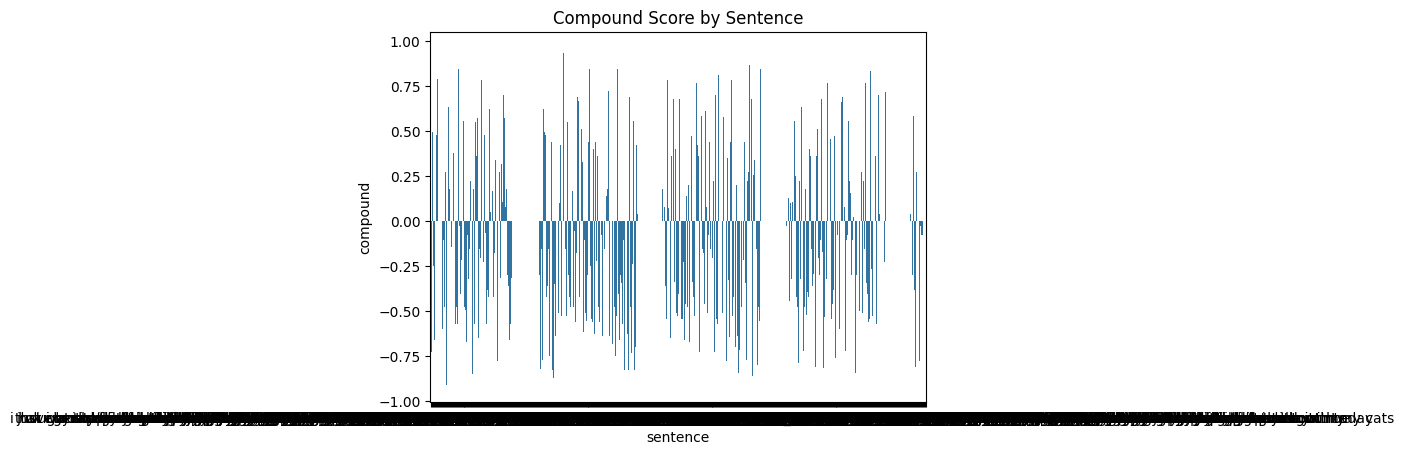

In [22]:
ax = sns.barplot(data=vaders, x='sentence', y='compound')
ax.set_title('Compound Score by Sentence')
plt.show()

<ipython-input-23-4bb138af17aa>:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


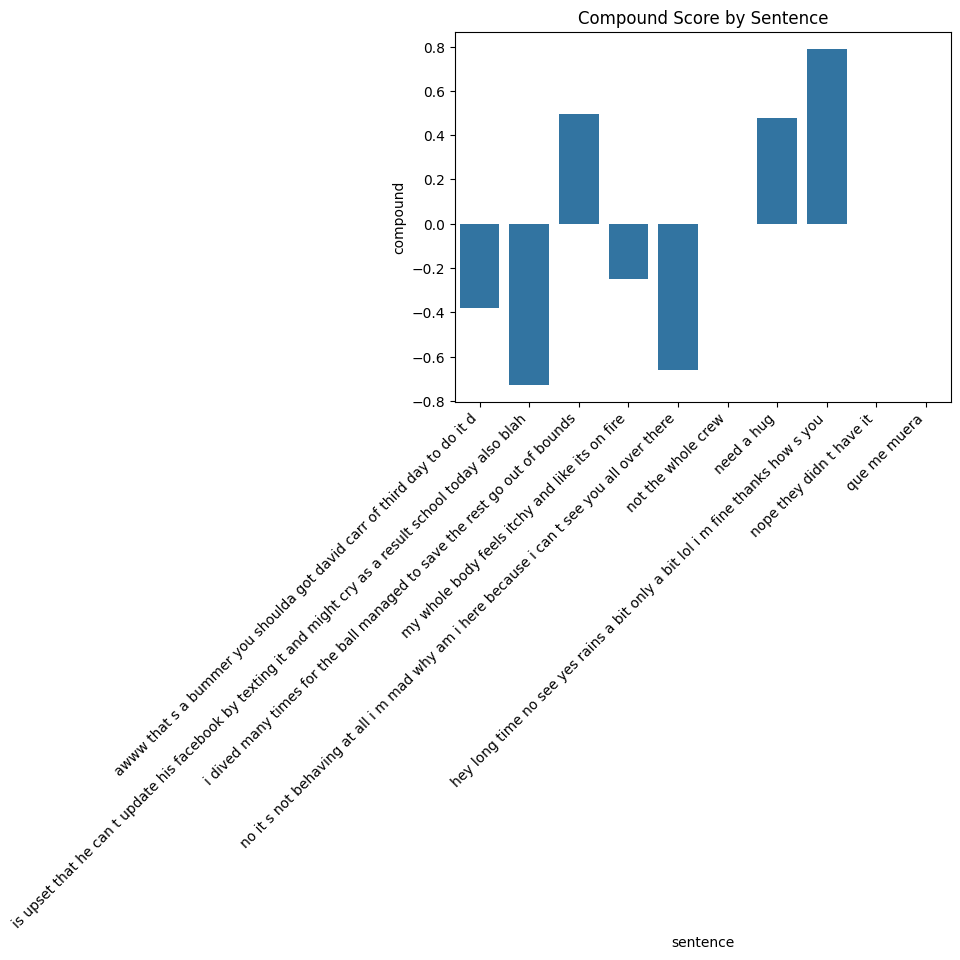

In [23]:
ax = sns.barplot(data=vaders.head(10), x='sentence', y='compound')
ax.set_title('Compound Score by Sentence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-24-465ff607fcff>:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


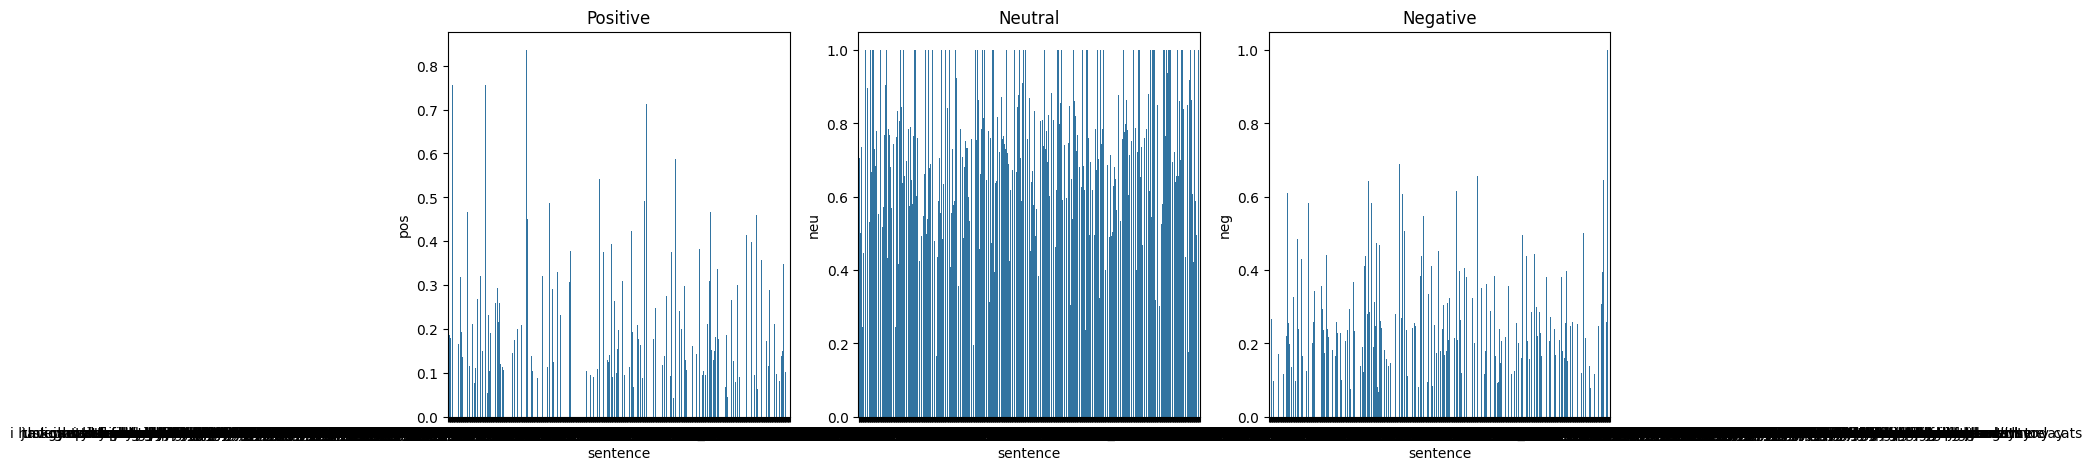

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='sentence', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentence', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentence', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
#VADER results on example
print(example)
sia.polarity_scores(example)

oh i m so sorry i didn t think about that before retweeting


{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.1513}

In [28]:
tokenizer(example, return_tensors='pt')

{'input_ids': tensor([[    0,  2678,   939,   475,    98,  6661,   939,   399,   326,   206,
            59,    14,   137, 24352,   154,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [29]:
#run for roBERTa model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.8104799), 'roberta_neu': np.float32(0.17776772), 'roberta_pos': np.float32(0.011752411)}


In [30]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict
#

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
      Sentence = row['sentence']
      myid = i
      res[myid] = sia.polarity_scores(Sentence)
      vader_result = sia.polarity_scores(Sentence)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      roberta_result = polarity_scores_roberta(Sentence)
      both = {**vader_result_rename, **roberta_result}
  except RuntimeError:
      print(f'Broke for id {myid}')
  res[myid] = both

  0%|          | 0/500 [00:00<?, ?it/s]

In [32]:
results_df = pd.DataFrame(res).T
results_df = vaders.merge(df, left_index=True, right_index=True, how='left')


In [33]:
results_df.head()

,neg,neu,pos,compound,sentence_x,sentiment_x,sentence_y,sentiment_y
0,0.167,0.833,0.000,-0.3818,awww that s a bummer you shoulda got david car...,0.0,awww that s a bummer you shoulda got david car...,0.0
1,0.295,0.705,0.000,-0.7269,is upset that he can t update his facebook by ...,0.0,is upset that he can t update his facebook by ...,0.0
2,0.000,0.814,0.186,0.4939,i dived many times for the ball managed to sav...,0.0,i dived many times for the ball managed to sav...,0.0
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,0.0,my whole body feels itchy and like its on fire,0.0
4,0.265,0.735,0.000,-0.6597,no it s not behaving at all i m mad why am i h...,0.0,no it s not behaving at all i m mad why am i h...,0.0


In [34]:
results_df.columns

Index(['neg', 'neu', 'pos', 'compound', 'sentence_x', 'sentiment_x',
       'sentence_y', 'sentiment_y'],
      dtype='object')

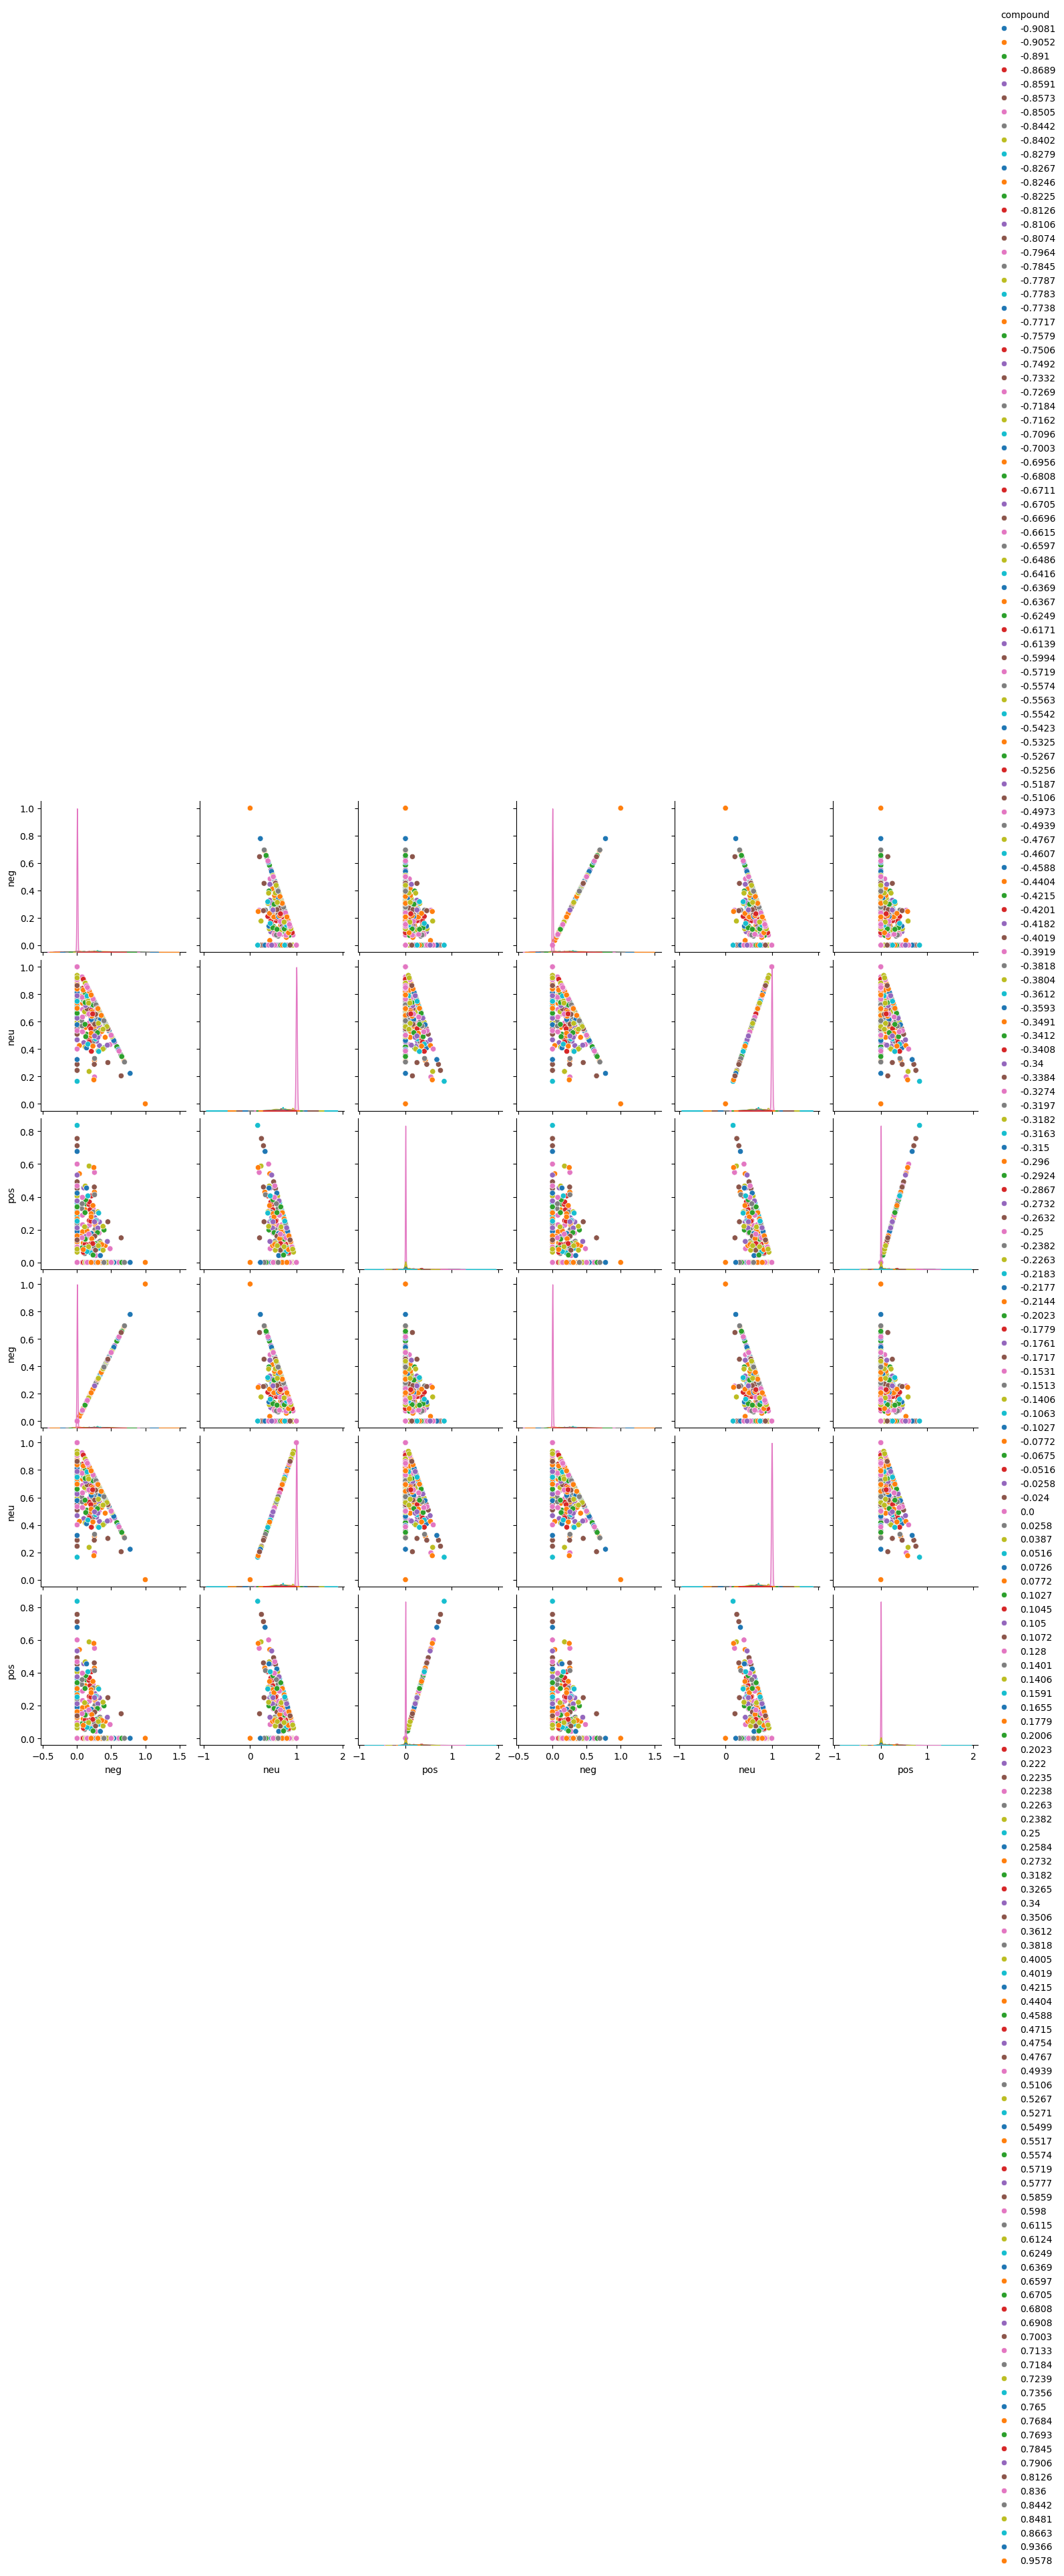

In [35]:
#Compare scores between models
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                   'neg', 'neu', 'pos'],
             hue='compound',
             palette='tab10')
plt.show()

In [130]:
#review examples
results_df.query('compound <= 0.1')\
    .sort_values('pos', ascending=False)['sentence_x'].values[0]

'is still nursing my nile but glad he is feeling better i hate when my baby is sick'

In [135]:
results_df.query('compound <= 0.1')\
    .sort_values('neg', ascending=False)['sentence_x'].values[0]

'sorry'

In [136]:
results_df.query('compound <= 0.1')\
    .sort_values('neu', ascending=False)['sentence_x'].values[0]

'i am listing more items on ebay to sell takes forever meanwhile coleman is watching the hills season premier without me'

In [ ]:
#EXTRA info: The transformer pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [156]:
sentiment_pipeline('I am good')

[{'label': 'POSITIVE', 'score': 0.999847412109375}]

In [153]:
sentiment_pipeline('I feel tired')

[{'label': 'NEGATIVE', 'score': 0.999769389629364}]